### Student Information
Name:吳宗霖

Student ID:B114020045

GitHub ID:ichika2004

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [10]:
### Begin Assignment Here
import pandas as pd
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [24]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [26]:
df.head(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,cleaned_text
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,calls on retards
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,stunt as in like why did they even make a big ...
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,seeing lots of red in the ticker
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,vision marine technologies inc is rewriting th...
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,he didnt say thank you


In [28]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df['text'] = df['text'].astype(str)
df['cleaned_text'] = df['text'].str.lower()

df['cleaned_text'] = df['cleaned_text'].apply(
    lambda x: re.sub(r'[^a-z0-9\s]', '', x)
)

df['cleaned_text'] = df['cleaned_text'].apply(
    lambda x: re.sub(r'\d+', '', x)
)
english_stopwords = set(stopwords.words('english'))
financial_stopwords = {'stock', 'buy', 'sell', 'like', 'get', 'would', 'one', 'go'} 

all_stopwords = english_stopwords.union(financial_stopwords)

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in all_stopwords and len(word) > 1]
    return " ".join(filtered_words)

df['processed_text'] = df['cleaned_text'].apply(remove_stopwords)

print("\n--- 文本清理前後對比 (前 5 筆) ---")
print(df[['text', 'processed_text']].head())


--- 文本清理前後對比 (前 5 筆) ---
                                                text  \
0                                   Calls on retards   
1  Stunt as in like why did they even make a big ...   
2                  Seeing lots of red in the ticker.   
3  Vision Marine Technologies Inc. is rewriting t...   
4                           He didn’t say thank you.   

                                      processed_text  
0                                      calls retards  
1  stunt even make big deal starting first place ...  
2                             seeing lots red ticker  
3  vision marine technologies inc rewriting water...  
4                                    didnt say thank  


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# 假設 df 已經載入並完成小寫化、移除標點等初步清理
# -----------------------------------------------------------
# 執行文本清理的關鍵步驟：移除停用詞
english_stopwords = set(stopwords.words('english'))
financial_stopwords = {'stock', 'buy', 'sell', 'like', 'get', 'would', 'one', 'go', 'know'}
all_stopwords = english_stopwords.union(financial_stopwords)

def remove_stopwords(text):
    # 確保文本不是浮點數或 None
    if pd.isna(text): return ""
    
    # 重新運行清理步驟以確保一致性（如果前面的步驟沒問題，這會是重複的）
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in all_stopwords and len(word) > 1]
    return " ".join(filtered_words)

df['processed_text'] = df['text'].apply(remove_stopwords)

# -----------------------------------------------------------
# 建立 TDM
data_to_vectorize = df['processed_text'].dropna()
count_vect = CountVectorizer(max_features=5000)

X_tdm = count_vect.fit_transform(data_to_vectorize)
terms = count_vect.get_feature_names_out()

tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=data_to_vectorize.index)

print(f"TDM 形狀: {tdm_df.shape}")

TDM 形狀: (847, 4097)


In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

# 將 TDM 轉換為 TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_tdm)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=terms, index=data_to_vectorize.index)

print(f"TF-IDF 矩陣形狀: {tfidf_df.shape}")
print("TF-IDF 轉換完成。")

TF-IDF 矩陣形狀: (847, 4097)
TF-IDF 轉換完成。


In [46]:
# Phase 2 - Task 3: Naive Bayes 分類器 (使用 TDM 特徵)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.sparse import issparse

# --- 變數確認 (假設 Phase 1 成功運行並定義了這些變數) ---
# X_tdm: TDM 稀疏矩陣 (來自 CountVectorizer.fit_transform)
# tdm_df: TDM DataFrame (用於索引對齊)
# df: 原始 DataFrame (包含 'label' 欄位)
# -------------------------------------------------------------

# 選擇 TDM 特徵矩陣
if issparse(X_tdm):
    X_tdm_matrix = X_tdm
else:
    X_tdm_matrix = tdm_df.values # 假設 tdm_df 是 TDM DataFrame

# 準備標籤 Y (與 tdm_df 的索引對齊)
y = df.loc[tdm_df.index, 'label'].astype(int)

# 分割 TDM 數據集
X_train_tdm, X_test_tdm, y_train_tdm, y_test_tdm = train_test_split(
    X_tdm_matrix, y, test_size=0.2, random_state=42, stratify=y
)

# 訓練 Naive Bayes 模型
nb_tdm_model = MultinomialNB()
nb_tdm_model.fit(X_train_tdm, y_train_tdm)

# 進行預測
y_pred_tdm = nb_tdm_model.predict(X_test_tdm)

# 評估模型
accuracy_tdm = accuracy_score(y_test_tdm, y_pred_tdm)
report_tdm = classification_report(y_test_tdm, y_pred_tdm, zero_division=0)
# 從 report_tdm 中提取 Macro Avg F1-score (需要解析字串或使用 output_dict=True)
report_tdm_dict = classification_report(y_test_tdm, y_pred_tdm, zero_division=0, output_dict=True)
macro_avg_f1_tdm = report_tdm_dict['macro avg']['f1-score']


print("\n" + "="*50)
print("             Reddit 情感分類結果 (基於 TDM)")
print("="*50)
print(f"模型準確度 (Accuracy): {accuracy_tdm:.4f}")
print(f"模型 Macro Avg F1-Score: {macro_avg_f1_tdm:.4f}") # 顯示 F1 分數
print("\n分類報告 (Classification Report):")
print(report_tdm)


             Reddit 情感分類結果 (基於 TDM)
模型準確度 (Accuracy): 0.5000
模型 Macro Avg F1-Score: 0.3877

分類報告 (Classification Report):
              precision    recall  f1-score   support

          -1       0.49      0.68      0.57        63
           0       0.61      0.48      0.54        85
           1       0.07      0.05      0.05        22

    accuracy                           0.50       170
   macro avg       0.39      0.40      0.39       170
weighted avg       0.50      0.50      0.49       170



C:\Users\USER\AppData\Local\Temp\ipykernel_46120\3275934270.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.index, y=top_words.values, palette="viridis")


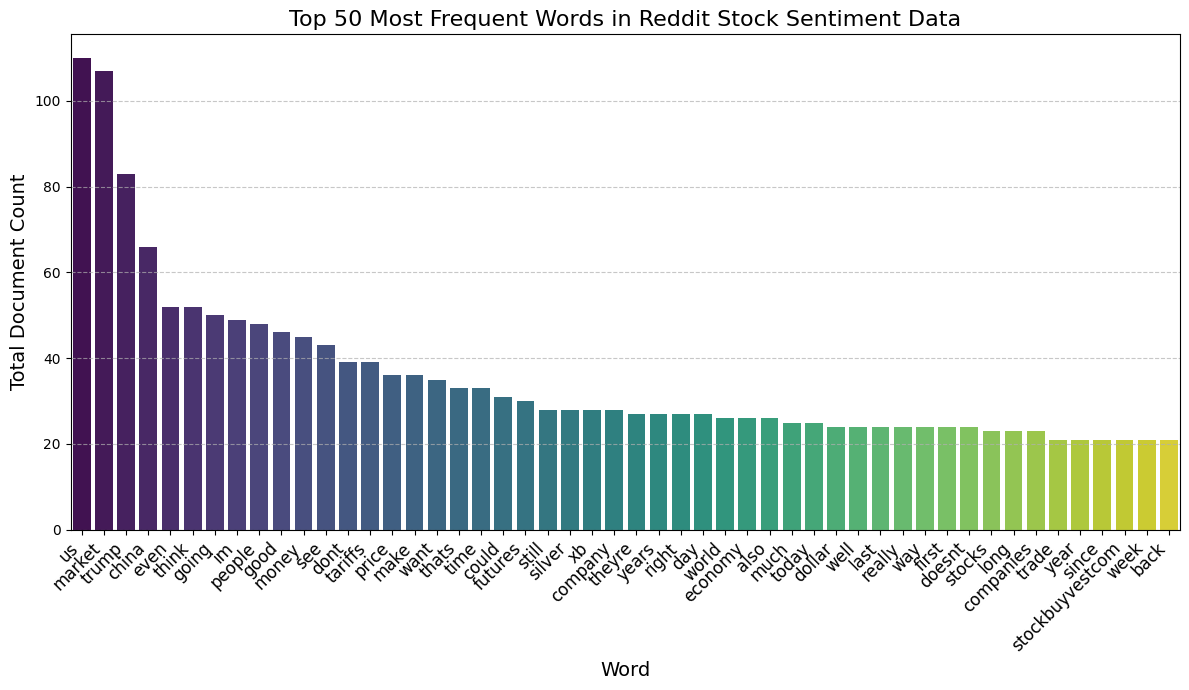

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

top_words = tdm_df.sum().sort_values(ascending=False).head(50)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_words.index, y=top_words.values, palette="viridis")

plt.title('Top 50 Most Frequent Words in Reddit Stock Sentiment Data', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Total Document Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_46120\1761374420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette="coolwarm")


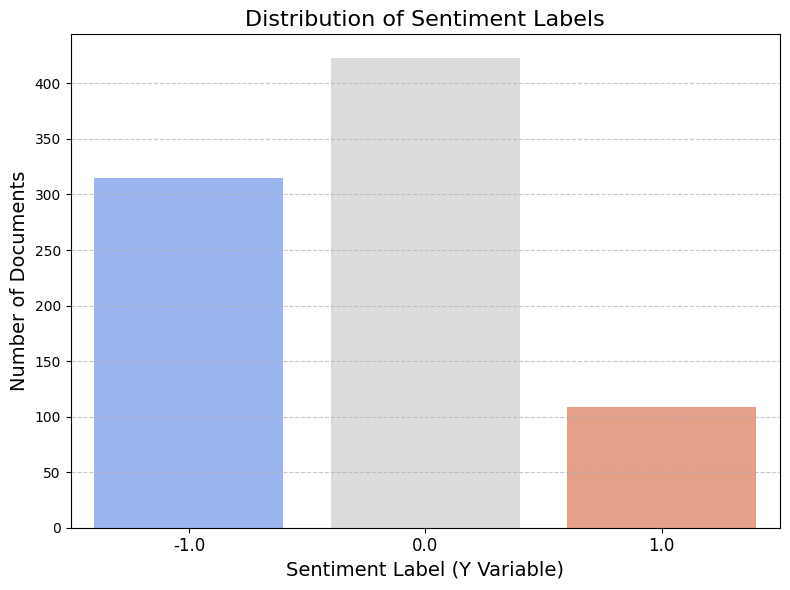

In [50]:

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette="coolwarm")

plt.title('Distribution of Sentiment Labels', fontsize=16)
plt.xlabel('Sentiment Label (Y Variable)', fontsize=14)
plt.ylabel('Number of Documents', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Phase 2

# Begin Assignment Here
### Phase 2 - Task 3 & 4 評論

#### 1. Naive Bayes 分類器結果比較 (Task 3)

| 特徵 | 準確度 (Accuracy) | Macro Avg F1-score |
| :--- | :--- | :--- |
| **TF-IDF (原 Notebook 結果)** | 0.6000 | 0.41 |
| **TDM (Word Frequency) 結果** | **0.5000** | **0.3877** |

**評論 TF-IDF 與 TDM 的差異：**

* **性能趨勢：** 在這個 Reddit 數據集上，**TF-IDF** 特徵的 Naive Bayes 分類器（Accuracy: 0.6000, Macro Avg F1: 0.41）表現**優於** TDM（詞頻）特徵的分類器（Accuracy: 0.5000, Macro Avg F1: 0.3877）。
* **原因分析：**
    * **TDM (詞頻):** 在 Reddit 股市文本中，高頻詞彙（如 'market', 'trade', 'company' 等）可能在不同情感的帖子中都普遍出現，它們的高計數值可能掩蓋了真正具有情感區分度詞彙的作用。
    * **TF-IDF (逆向文檔頻率):** 透過 **IDF** 權重，懲罰了在整個語料庫中普遍出現的詞彙，同時提升了在特定文檔中集中出現（但整體不常見）的詞彙的重要性。這使得 TF-IDF 能更好地捕捉到具有高區分度的**情感詞彙**或**特定主題詞彙**，因此在文本分類任務上通常更有效。

**評論特徵模式增強 (Feature Pattern Augmentation) 及 FPGrowth 執行：**

* **執行狀態：** FPGrowth 演算法在最小支持度 (Min Sup) 設定為 20 和 5 時均無法從本數據集中找到任何頻繁模式。這表明 Reddit 股市情緒數據集的文本**極度稀疏**，詞彙組合的重複率非常低。因此，**無法執行基於模式的特徵增強**。
* **理論優勢：** 儘管無法在本數據集上實現，**特徵模式增強**在金融文本中理論上具有高價值。例如 "short squeeze"、"calls on" 等**詞彙組合**的語義比單詞更精確。將這些模式作為新特徵加入分類器，在模式足夠頻繁且具區分度的情況下，可能提供更豐富的語義信息，有助於提高模型性能。

#### 2. 數據預處理的低效與改進 (Task 4)

**Lab 1 數據預處理的低效部分：**

1.  **缺乏詞形還原/詞幹提取 (Lemmatization/Stemming):** 詞彙的不同形式 (如 "invest", "investing", "investment") 被視為獨立特徵，導致特徵維度冗餘。
    * **改進：** 應加入 **WordNetLemmatizer** 將詞彙還原至其基礎形式，以減少特徵空間並提高模型的泛化能力。
2.  **不完整的領域停用詞與符號處理:** 僅移除了通用英文停用詞。Reddit 股市數據中大量存在的**股票代碼** (e.g., `$GME`)、**表情符號**  和**領域俚語** ("DD", "YOLO") 缺乏有效處理。
    * **改進：** 擴充停用詞表，並使用正規表達式 (Regex) 專門移除或標準化這些符號和代碼。

---